# Task-02 @ Prodigy InfoTech

### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data.
---
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\VINAY\Downloads\train (1).csv") 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---
### Handling Missing Values

#### Dropping Unnecessary Columns

In [7]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

#### Filling missing values of 'Age' with median value

In [8]:
df['Age'].fillna(df['Age'].median(), inplace = True)

#### Filling missing values of 'Embarked' with the most frequent value

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
df.isnull().sum().sum()

0

---
### Converting Categorical Variables

#### Applying One-hot encodig on 'Sex' and 'Embarked' columns

In [12]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = False)

In [13]:
df = df.astype(int)

df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1
5,0,3,28,0,0,8,0,1,0,1,0
6,0,1,54,0,0,51,0,1,0,0,1
7,0,3,2,3,1,21,0,1,0,0,1
8,1,3,27,0,2,11,1,0,0,0,1
9,1,2,14,1,0,30,1,0,1,0,0


---
## Visualizations

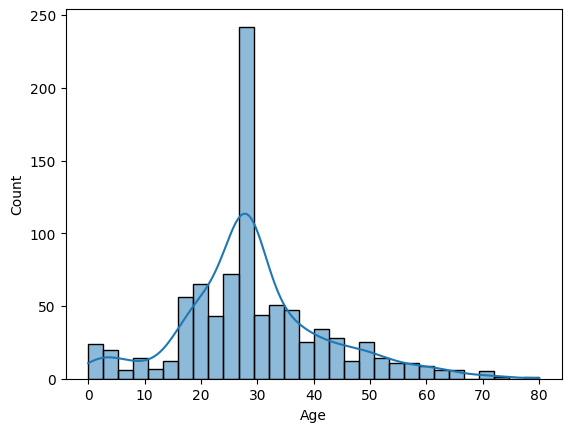

In [14]:
sns.histplot(df['Age'], kde = True)
plt.show()

---
## Relationships between Numerical Variables

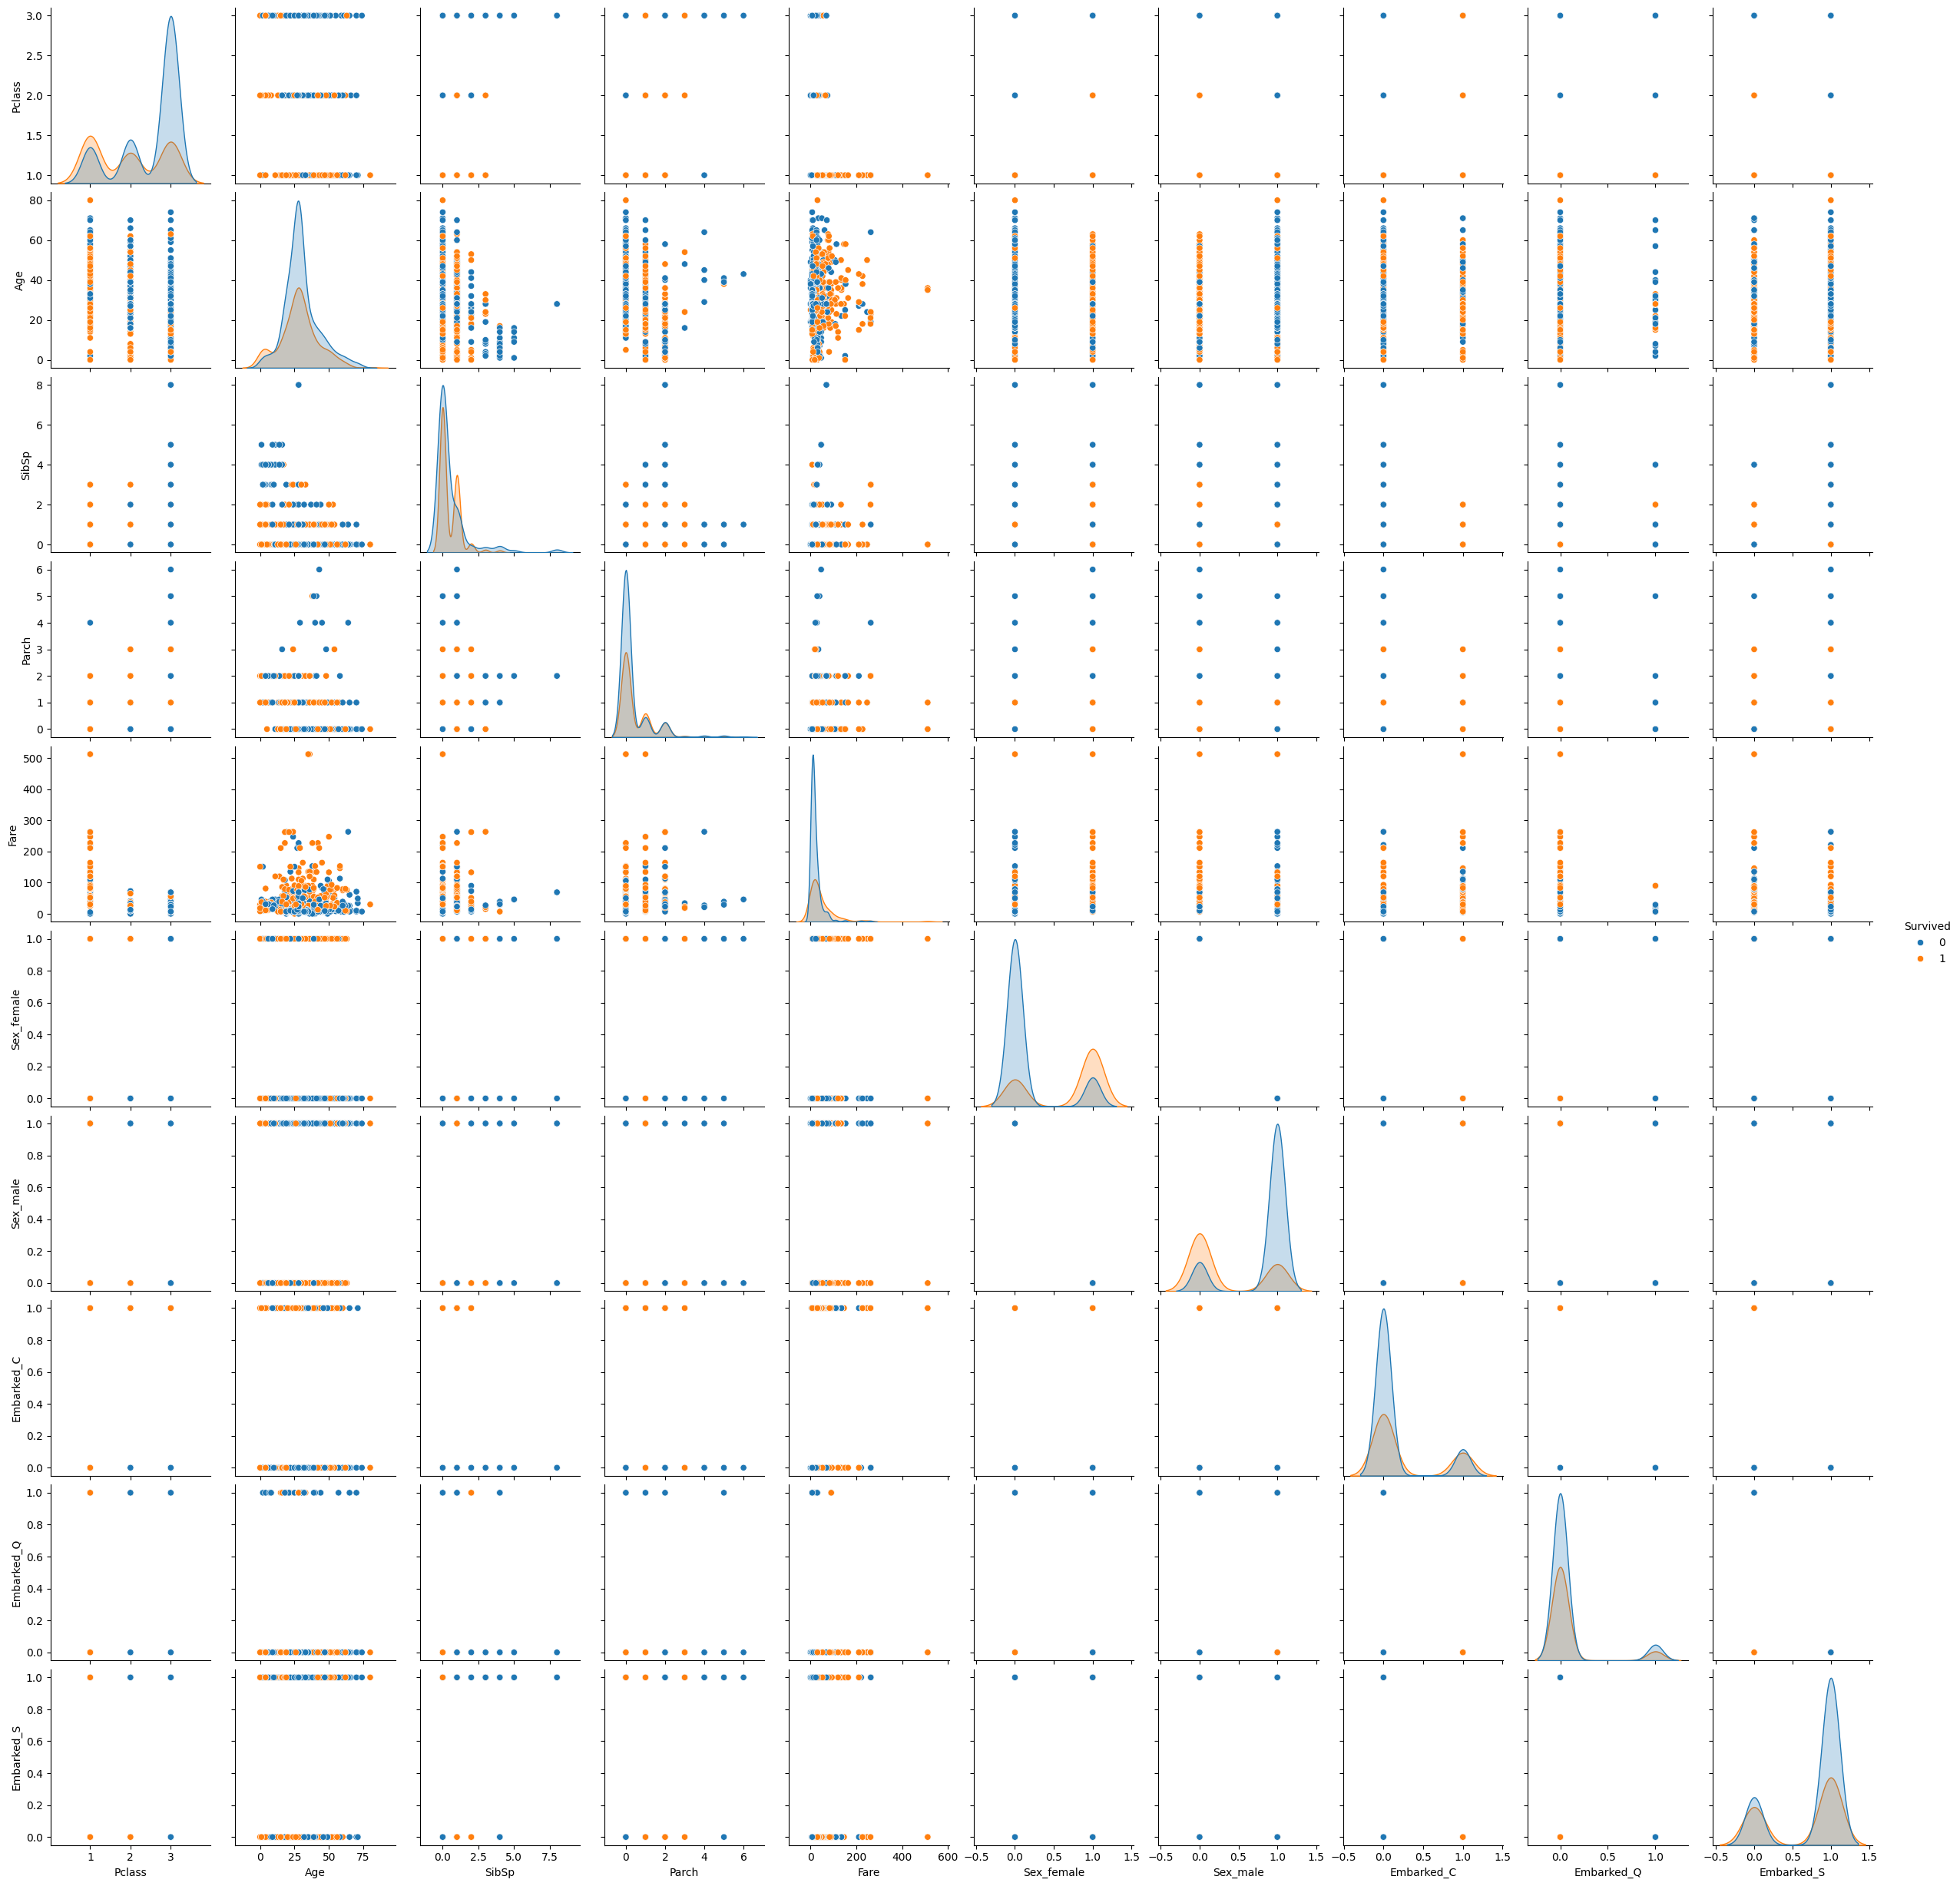

In [15]:
sns.pairplot(df, hue = 'Survived')
plt.show()

---
## Relationship Between Age and Survival

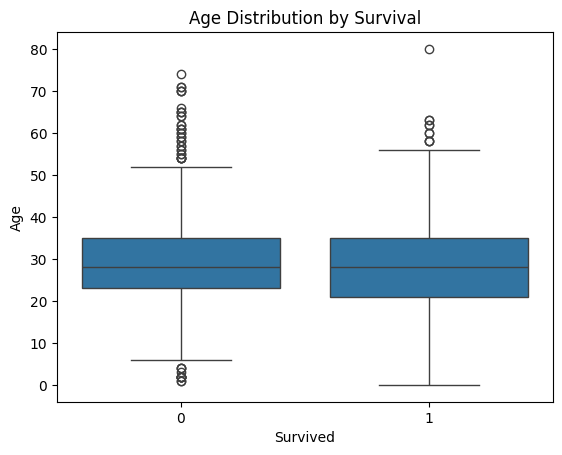

In [16]:
sns.boxplot(x = 'Survived', y = 'Age', data = df)
plt.title('Age Distribution by Survival')
plt.show()

#### Insight: Younger passengers may have had a higher chance of survival, especially children.

---
## Relationship Between Passenger Class and Survival

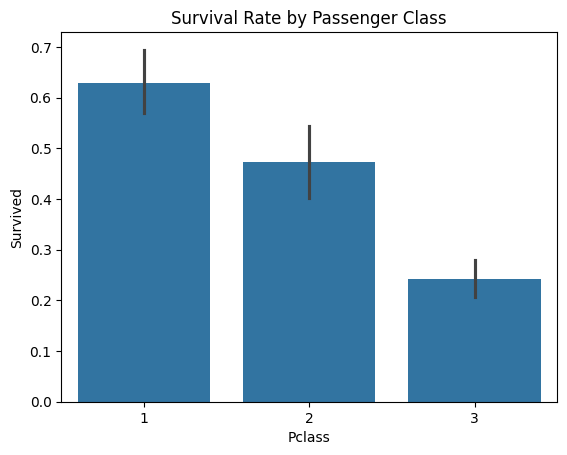

In [17]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.title('Survival Rate by Passenger Class')
plt.show()

#### Insight: First-class passengers likely had a higher survival rate compared to second and third-class passengers.

---
## Relationship Between Gender and Survival

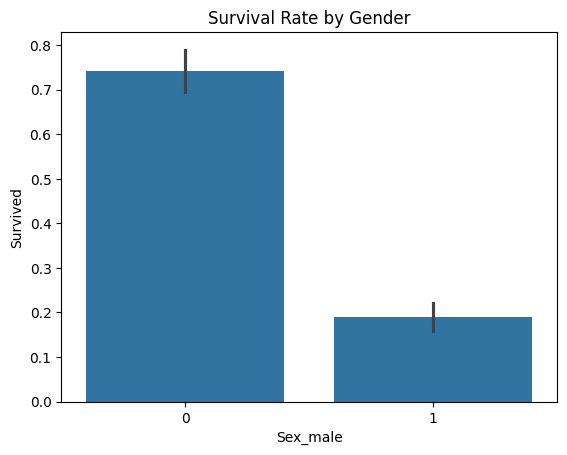

In [18]:
sns.barplot(x = 'Sex_male', y = 'Survived', data = df)
plt.title('Survival Rate by Gender')
plt.show()

#### Insight: Female passengers generally had a higher survival rate than male passengers.

---
## Correlation Between Numerical Variables

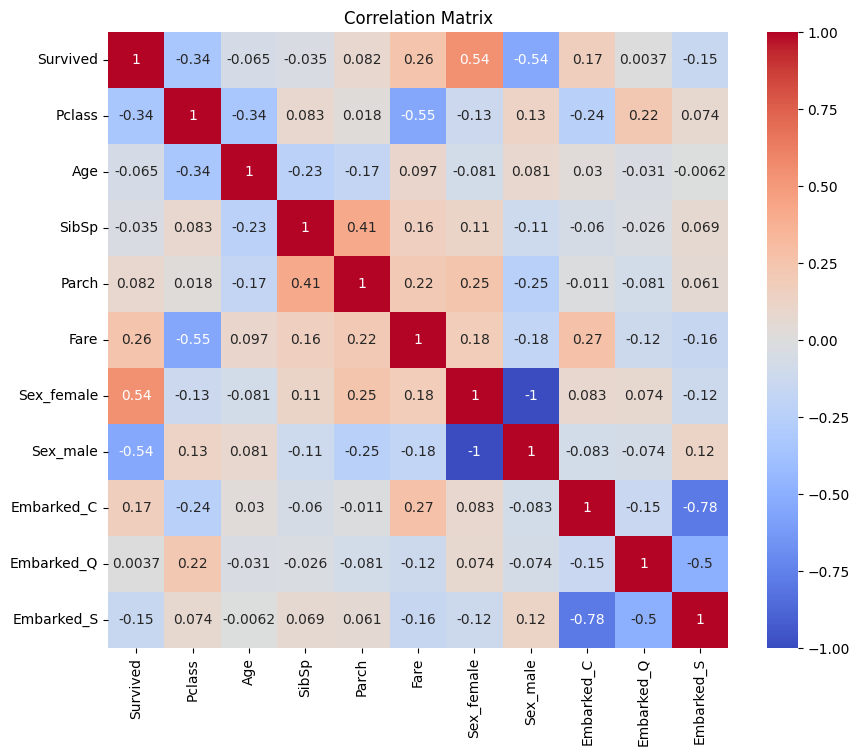

In [19]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Insight: Look for strong positive or negative correlations. For example, Pclass might be negatively correlated with survival, indicating that lower-class passengers had a lower survival rate.

---
## Survival Rate Based on Fare

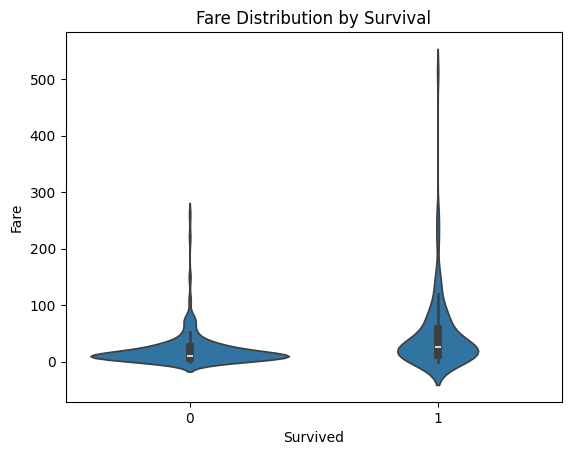

In [20]:
sns.violinplot(x = 'Survived', y = 'Fare', data = df)
plt.title('Fare Distribution by Survival')
plt.show()

#### Insight: Passengers who paid higher fares may have had a higher survival rate, potentially due to being in first class.

---
## Relationship Between Embarked Port and Survival

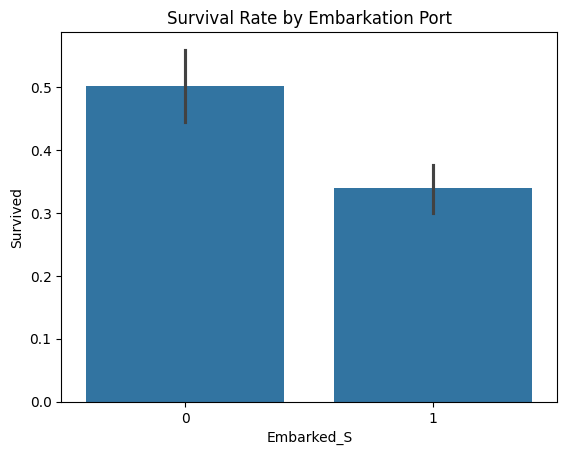

In [21]:
sns.barplot(x = 'Embarked_S', y = 'Survived', data = df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

#### Insight: There might be variations in survival rates depending on the port from which passengers boarded.

---
## Target Variable Analysis

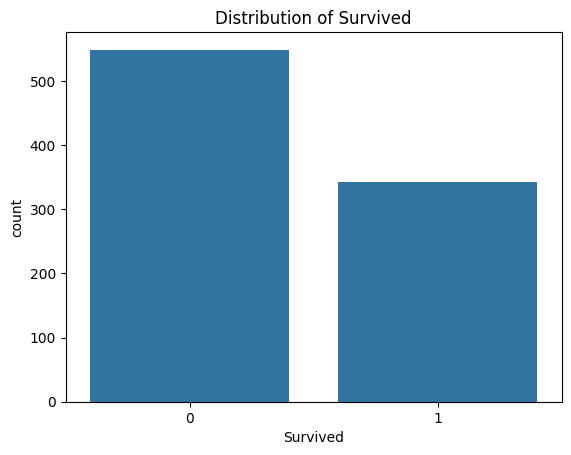

In [22]:
sns.countplot(x = 'Survived', data = df)
plt.title('Distribution of Survived')
plt.show()